In [1]:
import numpy as np
import sympy as smp
import matplotlib.pyplot as plt
from scipy.integrate import odeint 
from matplotlib import animation
from matplotlib.animation import PillowWriter
from sympy.simplify.simplify import simplify
from sympy import init_printing
from sympy import pprint


In [2]:
t, m, g, k = smp.symbols('t, m, g, k')

the1, the2, r1, r2 = smp.symbols(r'\theta_1, \theta_2, r_1, r_2', cls=smp.Function)

the1 = the1(t)
the1_d = smp.diff(the1, t)
the1_dd = smp.diff(smp.diff(the1, t), t)

the2 = the2(t)
the2_d = smp.diff(the2, t)
the2_dd = smp.diff(smp.diff(the2, t), t)

r1 = r1(t)
r1_d = smp.diff(r1, t)
r1_dd = smp.diff(smp.diff(r1, t), t)

r2 = r2(t)
r2_d = smp.diff(r2, t)
r2_dd = smp.diff(smp.diff(r2, t), t)

x1, y1, x2, y2 = smp.symbols('x_1, y_1, x_2, y_2', cls = smp.Function)

x1 = x1(the1, r1)
y1 = y1(the1, r1)

x2 = x2(the1, r1, the2, r2)
y2 = y2(the1, r1, the2, r2)

x1 = (1+r1)*smp.cos(the1)
y1 = -(1+r1)*smp.sin(the1)
x2 = (1+r1)*smp.cos(the1) + (1+r2)*smp.cos(the2)
y2 = -(1+r1)*smp.sin(the1) - (1+r2)*smp.sin(the2)

x1_d = smp.diff(x1, t)**2
y1_d = smp.diff(y1, t)**2
x2_d = smp.diff(x2, t)**2
y2_d = smp.diff(y2, t)**2

In [19]:
y2_d

((-r_1(t) - 1)*cos(\theta_1(t))*Derivative(\theta_1(t), t) + (-r_2(t) - 1)*cos(\theta_2(t))*Derivative(\theta_2(t), t) - sin(\theta_1(t))*Derivative(r_1(t), t) - sin(\theta_2(t))*Derivative(r_2(t), t))**2

In [3]:
T = 1/2 * m * (x1_d + y1_d) + 1/2 * m * (x2_d + y2_d)

V = m*g*y1 + m*g*y2 + 1/2 * k * r1**2 + 1/2 * k * r2**2

L = T-V



In [16]:
T

0.5*m*(((-r_1(t) - 1)*cos(\theta_1(t))*Derivative(\theta_1(t), t) - sin(\theta_1(t))*Derivative(r_1(t), t))**2 + (-(r_1(t) + 1)*sin(\theta_1(t))*Derivative(\theta_1(t), t) + cos(\theta_1(t))*Derivative(r_1(t), t))**2) + 0.5*m*(((-r_1(t) - 1)*cos(\theta_1(t))*Derivative(\theta_1(t), t) + (-r_2(t) - 1)*cos(\theta_2(t))*Derivative(\theta_2(t), t) - sin(\theta_1(t))*Derivative(r_1(t), t) - sin(\theta_2(t))*Derivative(r_2(t), t))**2 + (-(r_1(t) + 1)*sin(\theta_1(t))*Derivative(\theta_1(t), t) - (r_2(t) + 1)*sin(\theta_2(t))*Derivative(\theta_2(t), t) + cos(\theta_1(t))*Derivative(r_1(t), t) + cos(\theta_2(t))*Derivative(r_2(t), t))**2)

In [5]:
LE1 = smp.diff(L, the1) - smp.diff(smp.diff(L, the1_d), t)
LE1 = LE1.simplify()

LE2 = smp.diff(L, the2) - smp.diff(smp.diff(L, the2_d), t)
LE2 = LE2.simplify()

LE3 = smp.diff(L, r1) - smp.diff(smp.diff(L, r1_d), t)
LE3 = LE3.simplify()

LE4 = smp.diff(L, r2) - smp.diff(smp.diff(L, r2_d), t)
LE4 = LE4.simplify()

In [7]:
sols = smp.solve([LE1, LE2, LE3, LE4], (the1_dd, the2_dd, r1_dd, r2_dd), simplify=False, rational=False)

In [9]:
dw1dt_f = smp.lambdify((m, k, g, the1, the2, r1, r2, the1_d, the2_d, r1_d, r2_d), sols[the1_dd])
dthe1dt_f = smp.lambdify(the1_d, the1_d)

dw2dt_f = smp.lambdify((m, k, g, the1, the2, r1, r2, the1_d, the2_d, r1_d, r2_d), sols[the2_dd])
dthe2dt_f = smp.lambdify(the2_d, the2_d)

dv1dt_f = smp.lambdify((m, k, g, the1, the2, r1, r2, the1_d, the2_d, r1_d, r2_d), sols[r1_dd])
dr1dt_f = smp.lambdify(r1_d, r1_d)

dv2dt_f = smp.lambdify((m, k, g, the1, the2, r1, r2, the1_d, the2_d, r1_d, r2_d), sols[r2_dd])
dr2dt_f = smp.lambdify(r2_d, r2_d)


In [10]:
def dSdt(S, t):
    the1, w1, the2, w2, r1, v1, r2, v2 = S
    return[
        dthe1dt_f(w1),
        dw1dt_f(m,k,g,the1,the2,r1,r2,w1,w2,v1,v2),
        dthe2dt_f(w2),
        dw2dt_f(m,k,g,the1,the2,r1,r2,w1,w2,v1,v2),
        dr1dt_f(v1),
        dv1dt_f(m,k,g,the1,the2,r1,r2,w1,w2,v1,v2),
        dr2dt_f(v2),
        dv2dt_f(m,k,g,the1,the2,r1,r2,w1,w2,v1,v2)
    ]

In [12]:
t = np.linspace(0, 20, 1000)
g = 9.81
m = 1
k = 10
y0=[np.pi/2,0,(3/2)*np.pi/2,0,0,5,0,5]

ans = odeint(dSdt, y0, t)

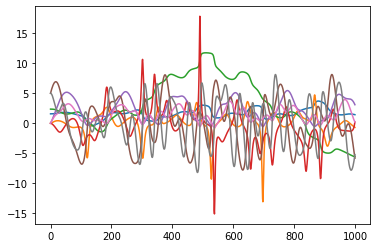

In [21]:
plt.plot(ans.T[0])
plt.plot(ans.T[1])
plt.plot(ans.T[2])
plt.plot(ans.T[3])
plt.plot(ans.T[4])
plt.plot(ans.T[5])
plt.plot(ans.T[6])
plt.plot(ans.T[7])

In [23]:
def get_x1y1x2y2(the1, the2, r1, r2):
    return(
        (1+r1)*np.cos(the1),
        -(1+r1)*np.sin(the1),
        (1+r1)*np.cos(the1) + (1+r2)*np.cos(the2),
        -(1+r1)*np.sin(the1) - (1+r2)*np.sin(the2)
    )

In [26]:
x1, y1, x2, y2 = get_x1y1x2y2(ans.T[0], ans.T[2], ans.T[4], ans.T[6])

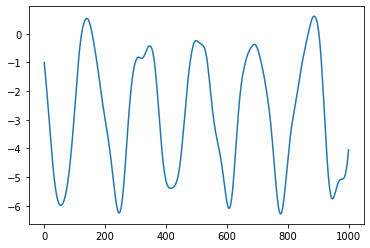

In [27]:
plt.plot(y1)

In [28]:
def animate(i):
    ln1.set_data([0, x1[i], x2[i]], [0, y1[i], y2[i]])

fig, ax = plt.subplots(1,1, figsize=(8,8))
ax.grid
ln1, = plt.plot([], [], 'ro--', lw=3, markersize=8)
ax.set_ylim(-10,10)
ax.set_xlim(-10,10)
ani = animation.FuncAnimation(fig, animate, frames = 1000, interval = 50)
ani.save('pen.gif', writer ='pillow', fps=50)

OSError: [Errno 30] Read-only file system: 'pen.gif'